<a href="https://colab.research.google.com/github/aleksthegr8/MCF_projects/blob/main/Anticipating_Cryptocurrency_Prices_Using_Machine_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

The original paper **"Alessandretti et al. (2018) Anticipating Cryptocurrency Prices Using Machine Learning"** tested three models in predicting daily cryptocurrency price for 1681 currencies. Two of the models are based on gradient boosting decision trees and one is based on LSTM (Long Short Term Memory) recurrent neural networks. Performance was compared in terms of return on investment. 

**About LSTM:**

Long short-term memory (LSTM) is an artificial recurrent neural network (RNN) architecture used in the field of deep learning. LSTM networks are well-suited to classifying, processing and making predictions based on time series data, since there can be lags of unknown duration between important events in a time series. The unit is called a long short-term memory block because the program is using a structure founded on short-term memory processes to create longer-term memory. In the use case of the Dow Jones Industrial Average, both LSTM and ARIMA give good prediction results while examining against the test set. However, LSTM is more suitable for time series forecasting in practice with one single fitting and without any parameter optimization

**Remark**: We have chosen the LSTM model for it has showed most promise when it comes to trading performance. The other two models, although having greater interpretability, were suboptimal in comparison to LSTM. 

**Remark**: Our work consists of using the LSTM model to best describe BTC cryptocurrency price. In stead of trading and computing ROI, we will use MSE as our performance indicator.

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from pylab import rcParams
from sklearn.metrics import mean_squared_error

In [ ]:
%matplotlib inline
sns.set(style='whitegrid', palette='muted', font_scale=1.5)
rcParams['figure.figsize'] = 18, 9

In [ ]:
csv_path = "https://raw.githubusercontent.com/curiousily/Deep-Learning-For-Hackers/master/data/3.stock-prediction/BTC-USD.csv"

In [ ]:
df = pd.read_csv(csv_path, parse_dates=['Date'])
df = df.sort_values('Date')

In [ ]:
df.shape

(3201, 7)

In [ ]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-07-16,0.04951,0.04951,0.04951,0.04951,0.04951,0
1,2010-07-17,0.04951,0.08585,0.05941,0.08584,0.08584,5
2,2010-07-18,0.08584,0.09307,0.07723,0.08080,0.08080,49
3,2010-07-19,0.08080,0.08181,0.07426,0.07474,0.07474,20
4,2010-07-20,0.07474,0.07921,0.06634,0.07921,0.07921,42


In [ ]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,3201.000000,3201.000000,3201.000000,3201.000000,3201.000000,3.201000e+03
mean,1632.572142,1685.520652,1572.301256,1634.223784,1634.223784,1.524097e+08
std,2962.079779,3072.653887,2824.316299,2962.630150,2962.630150,4.070572e+08
min,0.049510,0.049510,0.010000,0.049510,0.049510,0.000000e+00
25%,12.500000,12.690000,12.250000,12.510000,12.510000,5.362670e+05
50%,361.670013,374.670013,350.489990,361.709991,361.709991,1.012788e+07
75%,1033.300049,1062.790039,992.450012,1033.719971,1033.719971,6.814613e+07
max,19346.599609,19870.619141,18750.910156,19345.490234,19345.490234,6.245732e+09


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3201 entries, 0 to 3200
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       3201 non-null   datetime64[ns]
 1   Open       3201 non-null   float64       
 2   High       3201 non-null   float64       
 3   Low        3201 non-null   float64       
 4   Close      3201 non-null   float64       
 5   Adj Close  3201 non-null   float64       
 6   Volume     3201 non-null   int64         
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 200.1 KB


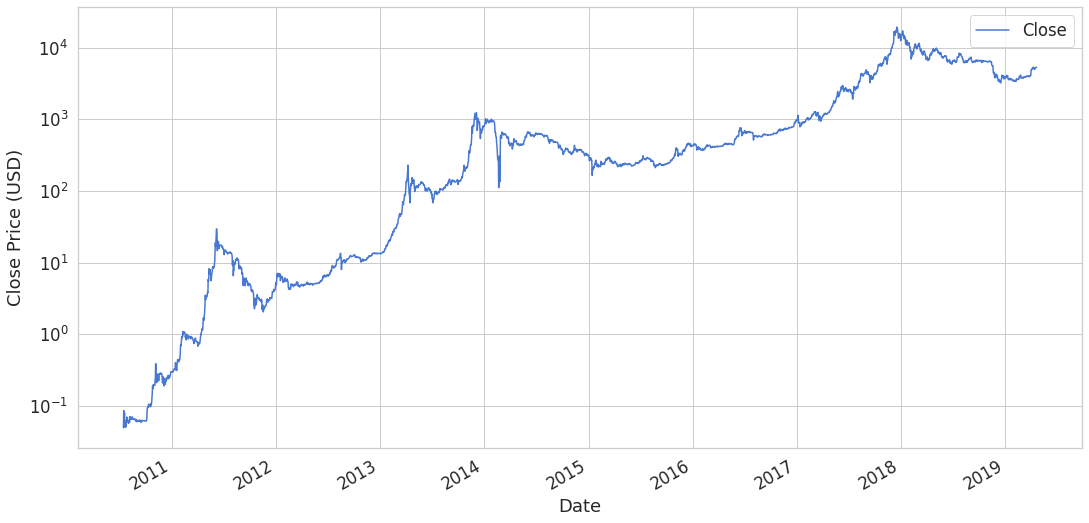

In [ ]:
ax = df.plot(x='Date', y='Close');
ax.set_xlabel("Date")
ax.set_ylabel("Close Price (USD)")
ax.set_yscale('log')

In [ ]:
X = df.iloc[:, 1:-1]
y = df.iloc[:, 5:6]

In [ ]:
X

,Open,High,Low,Close,Adj Close
0,0.049510,0.049510,0.049510,0.049510,0.049510
1,0.049510,0.085850,0.059410,0.085840,0.085840
2,0.085840,0.093070,0.077230,0.080800,0.080800
3,0.080800,0.081810,0.074260,0.074740,0.074740
4,0.074740,0.079210,0.066340,0.079210,0.079210
...,...,...,...,...,...
3196,5212.810059,5270.759766,5190.810059,5236.259766,5236.259766
3197,5236.259766,5317.779785,5232.990234,5289.750000,5289.750000
3198,5289.750000,5353.009766,5212.180176,5295.529785,5295.529785
3199,5295.529785,5366.600098,5274.450195,5326.180176,5326.180176


In [ ]:
y

,Adj Close
0,0.049510
1,0.085840
2,0.080800
3,0.074740
4,0.079210
...,...
3196,5236.259766
3197,5289.750000
3198,5295.529785
3199,5326.180176


In [ ]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
mm = MinMaxScaler()
ss = StandardScaler()


X_ss = ss.fit_transform(X)
y_mm = mm.fit_transform(y) 

In [ ]:
X_ss

array([[-0.55122678, -0.54862491, -0.55677099, -0.55168196, -0.55168196],
       [-0.55122678, -0.54861309, -0.55676749, -0.55166969, -0.55166969],
       [-0.55121451, -0.54861074, -0.55676118, -0.55167139, -0.55167139],
       ...,
       [ 1.23485845,  1.19377654,  1.28896597,  1.23602267,  1.23602267],
       [ 1.23681001,  1.19820022,  1.31101724,  1.24636996,  1.24636996],
       [ 1.24715922,  1.19233784,  1.29625732,  1.23946962,  1.23946962]])

In [ ]:
y_mm

array([[0.00000000e+00],
       [1.87796187e-06],
       [1.61743537e-06],
       ...,
       [2.73732729e-01],
       [2.75317101e-01],
       [2.74260525e-01]])

In [ ]:
train_split = int(X_ss.shape[0] * 0.7)

In [ ]:
X_train = X_ss[:train_split, :]
X_test = X_ss[train_split:, :]

y_train = y_mm[:train_split, :]
y_test = y_mm[train_split:, :] 

In [ ]:
print('Training Shape', X_train.shape, y_train.shape)
print('Testing Shape', X_test.shape, y_test.shape) 

Training Shape (2240, 5) (2240, 1)
Testing Shape (961, 5) (961, 1)


In [ ]:
import torch #pytorch
import torch.nn as nn
from torch.autograd import Variable 

In [ ]:
X_train_tensors = Variable(torch.Tensor(X_train))
X_test_tensors = Variable(torch.Tensor(X_test))

y_train_tensors = Variable(torch.Tensor(y_train))
y_test_tensors = Variable(torch.Tensor(y_test)) 

In [ ]:
#reshaping to rows, timestamps, features

X_train_tensors_final = torch.reshape(X_train_tensors,   (X_train_tensors.shape[0], 1, X_train_tensors.shape[1]))


X_test_tensors_final = torch.reshape(X_test_tensors,  (X_test_tensors.shape[0], 1, X_test_tensors.shape[1]))

In [ ]:
print('Training Shape', X_train_tensors_final.shape, y_train_tensors.shape)
print('Testing Shape', X_test_tensors_final.shape, y_test_tensors.shape)

Training Shape torch.Size([2240, 1, 5]) torch.Size([2240, 1])
Testing Shape torch.Size([961, 1, 5]) torch.Size([961, 1])


In [ ]:
class LSTM1(nn.Module):
    def __init__(self, num_classes, input_size, hidden_size, num_layers, seq_length):
        super(LSTM1, self).__init__()
        self.num_classes = num_classes #number of classes
        self.num_layers = num_layers #number of layers
        self.input_size = input_size #input size
        self.hidden_size = hidden_size #hidden state
        self.seq_length = seq_length #sequence length

        self.lstm = nn.LSTM(input_size=input_size, hidden_size=hidden_size,
                          num_layers=num_layers, batch_first=True) #lstm
        self.fc_1 =  nn.Linear(hidden_size, 128) #fully connected 1
        self.fc = nn.Linear(128, num_classes) #fully connected last layer

        self.relu = nn.ReLU()
    
    def forward(self,x):
        h_0 = Variable(torch.zeros(self.num_layers, x.size(0), self.hidden_size)) #hidden state
        c_0 = Variable(torch.zeros(self.num_layers, x.size(0), self.hidden_size)) #internal state
        # Propagate input through LSTM
        output, (hn, cn) = self.lstm(x, (h_0, c_0)) #lstm with input, hidden, and internal state
        hn = hn.view(-1, self.hidden_size) #reshaping the data for Dense layer next
        out = self.relu(hn)
        out = self.fc_1(out) #first Dense
        out = self.relu(out) #relu
        out = self.fc(out) #Final Output
        return out

In [ ]:
num_epochs = 500 #1000 epochs
learning_rate = 0.01 #0.001 lr

input_size = 5 #number of features
hidden_size = 200 #number of features in hidden state
num_layers = 1 #number of stacked lstm layers

num_classes = 1 #number of output classes

In [ ]:
lstm1 = LSTM1(num_classes, input_size, hidden_size, num_layers, X_train_tensors_final.shape[1]) #our lstm class 

In [ ]:
criterion = torch.nn.MSELoss()    # mean-squared error for regression
optimizer = torch.optim.Adam(lstm1.parameters(), lr=learning_rate) 

In [ ]:
for epoch in range(num_epochs):
  outputs = lstm1.forward(X_train_tensors_final) #forward pass
  optimizer.zero_grad() #caluclate the gradient, manually setting to 0
 
  # obtain the loss function
  loss = criterion(outputs, y_train_tensors)
 
  loss.backward() #calculates the loss of the loss function
 
  optimizer.step() #improve from loss, i.e backprop
  if epoch % 50 == 0:
    print("Epoch: %d, loss: %1.5f" % (epoch, loss.item()))

Epoch: 0, loss: 0.00140
Epoch: 50, loss: 0.00016
Epoch: 100, loss: 0.00001
Epoch: 150, loss: 0.00000
Epoch: 200, loss: 0.00000
Epoch: 250, loss: 0.00000
Epoch: 300, loss: 0.00000
Epoch: 350, loss: 0.00000
Epoch: 400, loss: 0.00000
Epoch: 450, loss: 0.00000


In [ ]:
df_X_ss = ss.transform(df.iloc[:, 1:-1]) #old transformers
df_y_mm = mm.transform(df.iloc[:, 5:6]) #old transformers

df_X_ss = Variable(torch.Tensor(df_X_ss)) #converting to Tensors
df_y_mm = Variable(torch.Tensor(df_y_mm))
#reshaping the dataset
df_X_ss = torch.reshape(df_X_ss, (df_X_ss.shape[0], 1, df_X_ss.shape[1]))

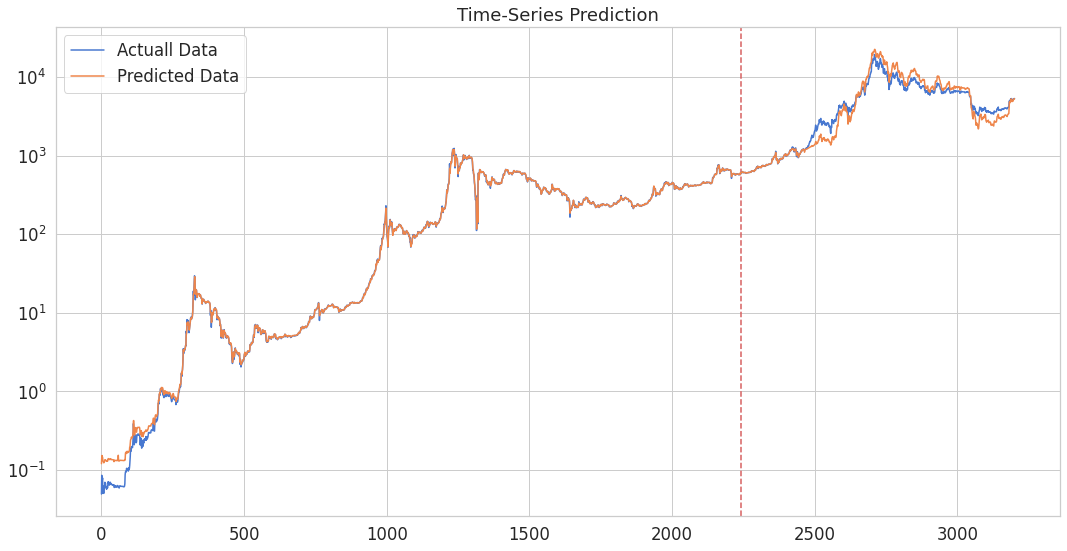

In [ ]:
train_predict = lstm1(df_X_ss)#forward pass
data_predict = train_predict.data.numpy() #numpy conversion
dataY_plot = df_y_mm.data.numpy()

data_predict = mm.inverse_transform(data_predict) #reverse transformation
dataY_plot = mm.inverse_transform(dataY_plot)
plt.axvline(x=train_split, c='r', linestyle='--') #size of the training set

plt.plot(dataY_plot, label='Actuall Data') #actual plot
plt.plot(data_predict, label='Predicted Data') #predicted plot
plt.title('Time-Series Prediction')
plt.yscale('log')
plt.legend()
plt.show()

In [ ]:
mse = mean_squared_error(data_predict,dataY_plot)
mse

677469.3